In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("clean_data.csv")

df['ser_start_dt'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['ser_start'], format='%y%m%d %H:%M:%S')

df['arrival_dt'] = df['ser_start_dt'] - pd.to_timedelta(df['q_time'], unit='s')

df = df.sort_values('arrival_dt')

Promedio de llegadas por hora (Lambda): 3.73


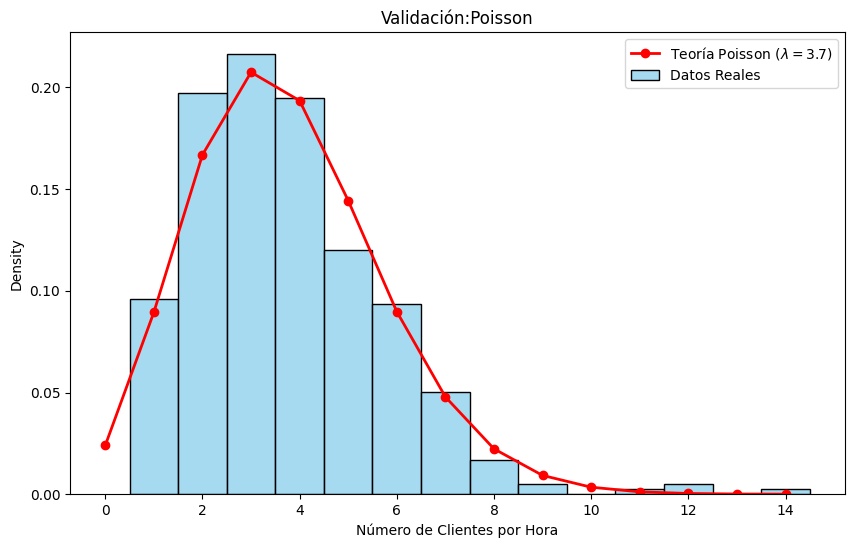

In [10]:
df['hour_bin'] = df['arrival_dt'].dt.floor('h')
conteo_llegadas = df.groupby('hour_bin').size()
conteo_llegadas = conteo_llegadas[conteo_llegadas > 0]

lambda_poisson = conteo_llegadas.mean()

print(f"Promedio de llegadas por hora (Lambda): {lambda_poisson:.2f}")

plt.figure(figsize=(10, 6))

sns.histplot(conteo_llegadas, bins=range(0, int(conteo_llegadas.max()) + 2),
             stat='density', color='skyblue', label='Datos Reales', discrete=True)

k = np.arange(0, int(conteo_llegadas.max()) + 1)
pmf_poisson = stats.poisson.pmf(k, mu=lambda_poisson)

plt.plot(k, pmf_poisson, 'ro-', lw=2, label=f'Teoría Poisson ($\\lambda={lambda_poisson:.1f}$)')

plt.title("Validación:Poisson")
plt.xlabel("Número de Clientes por Hora")
plt.legend()
plt.show()

Parámetros de Servicio 
Tiempo promedio de atención: 394.37 segundos
Tasa de servicio (Mu): 0.0025 clientes/segundo


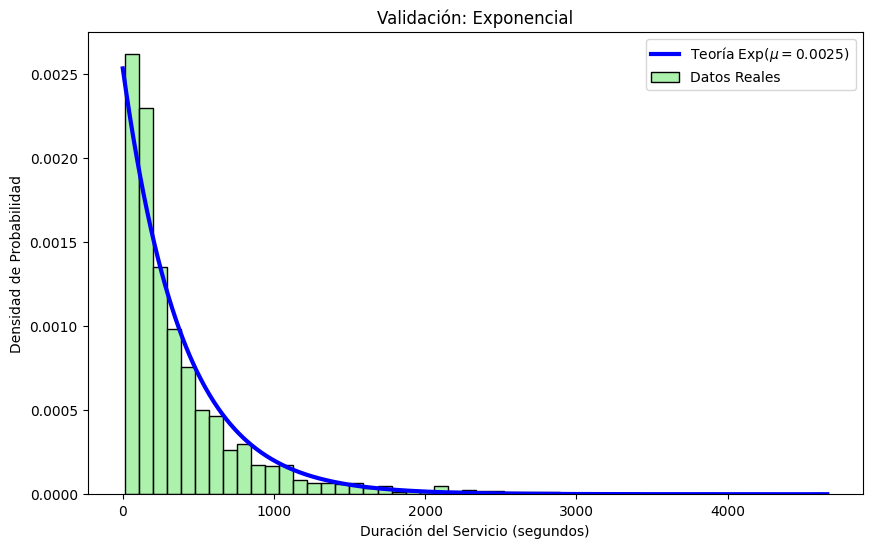

In [11]:
tiempos_servicio = df['ser_time']
tiempos_servicio = tiempos_servicio[tiempos_servicio > 0]

promedio_servicio = tiempos_servicio.mean()
mu_est = 1 / promedio_servicio

print(f"Parámetros de Servicio ")
print(f"Tiempo promedio de atención: {promedio_servicio:.2f} segundos")
print(f"Tasa de servicio (Mu): {mu_est:.4f} clientes/segundo")

plt.figure(figsize=(10, 6))

sns.histplot(tiempos_servicio, stat="density", bins=50, color="lightgreen", label="Datos Reales")

x = np.linspace(0, tiempos_servicio.max(), 1000)
pdf_exp = stats.expon.pdf(x, scale=1/mu_est)

plt.plot(x, pdf_exp, 'b-', lw=3, label=f'Teoría Exp($\\mu={mu_est:.4f}$)')

plt.title("Validación: Exponencial")
plt.xlabel("Duración del Servicio (segundos)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

In [15]:

print("\n RESULTADOS DE LA PRUEBA DE HIPÓTESIS (K-S)")

ks_llegadas = stats.kstest(inter_arrival_times, 'expon', args=(0, 1/lambda_est))

ks_servicio = stats.kstest(tiempos_servicio, 'expon', args=(0, 1/mu_est))

print(f"Llegadas (Poisson): P-value = {ks_llegadas.pvalue:.4e}")
print(f"Servicio (Exponencial): P-value = {ks_servicio.pvalue:.4e}")


 RESULTADOS DE LA PRUEBA DE HIPÓTESIS (K-S)
Llegadas (Poisson): P-value = 0.0000e+00
Servicio (Exponencial): P-value = 5.1748e-07
